In [2]:
print('hello')

hello


In [3]:
# downloading the libraries

import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap # correlation matrix

# worldcloud
import random
from wordcloud import WordCloud

# display ERD
from IPython.display import Image



# I - Exploring the data 

objective is to get more familiar with the data and review pandas / visulization logic

## A - Fetching the data 

In [4]:
# understanding where the files are located with terminal operations



In [5]:
# adding the path to fetch the files

raw_path = 'xxxx'


In [6]:
# creating pandas dataframes from .csv

df_customer = pd.read_csv("../data/olist_datasets/olist_customers_dataset.csv")
df_geolocation = pd.read_csv("../data/olist_datasets/olist_geolocation_dataset.csv")
df_orders = pd.read_csv("../data/olist_datasets/olist_orders_dataset.csv")
df_order_items = pd.read_csv("../data/olist_datasets/olist_order_items_dataset.csv")
df_order_payments = pd.read_csv("../data/olist_datasets/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("../data/olist_datasets/olist_order_reviews_dataset.csv")
df_products = pd.read_csv("../data/olist_datasets/olist_products_dataset.csv")
df_sellers = pd.read_csv("../data/olist_datasets/olist_sellers_dataset.csv")


## B - Exploring the orders dataframe

In [7]:
# printing columns, null count, and dtypes for the orders dataframe

print("ORDERS COLUMNS: " + "\n" + str(df_orders.columns))
print("-"*100)
print("ORDERS NULL VALUES: " + "\n" + str(df_orders.isnull().sum()))
print("-"*100)
print("ORDERS DTYPES: " + "\n" + str(df_orders.dtypes))


ORDERS COLUMNS: 
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
----------------------------------------------------------------------------------------------------
ORDERS NULL VALUES: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------------------------------------------------------------------
ORDERS DTYPES: 
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                

In [8]:
# printing the first 10 lines of the orders dataframe

print(df_orders.head(10))
print("-"*100)

# the last 10 lines of the dataframe

print(df_orders.tail(10))
print("-"*100)

# a sample of ten lines

print(df_orders.sample(10))
print("-"*100)

# getting all null values

print(df_orders.isnull().sum())
print("-"*100)


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2   

**why are there null values for approved_at, delivered_carrier_date, delivered_customer_date?**

*-> answer:* We don't know yet but it might be because there are outliers I will analyze to see

In [9]:
# fetching only particular columns of the df_orders dataframe

print(df_orders.columns)

## fetch the order_approved_at columns in a data series format, then in a dataframe format, and print the first five lines

order_approved_at_series = pd.Series(df_orders['order_approved_at'])
order_approved_at_df = pd.DataFrame(order_approved_at_series)
# print(order_approved_at_df.head(5))


## fetch the order_id, order_status, approved_at, delivered_carrier_date, delivered_customer_date

order_id = df_orders['order_id']
order_status = df_orders['order_status']
approved_at = df_orders['order_approved_at']
delivered_carrier_date = df_orders['order_delivered_carrier_date']
delivered_customer_date = df_orders['order_delivered_customer_date']




Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [10]:
# fetching the approved_at null columns - create another dataframe df_filtered, which will be filtered on order_approved_at is null, and print first 10 rows

df_filtered = df_orders[df_orders["order_approved_at"].isnull()]
print(df_orders.head(10))



                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2   

In [11]:
# count the order_id with a null approved_at by order_status

# with groupby method
null_orders_groupby = df_filtered.groupby('order_status')['order_id'].count()


# with value_counts method
null_orders_valuecounts = df_filtered['order_status'].value_counts()

null_orders_valuecounts

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

**what do you think of the results? Why is there a null approved at to begin with?**

-> *answer*: Based on the results most of the null approved at are based on canceled orders. It is null because the order has not been approved. There might be a mistake in the case where it's delivered or created.

## C - Creating a simple visualization using Matplotlib or Seaborn

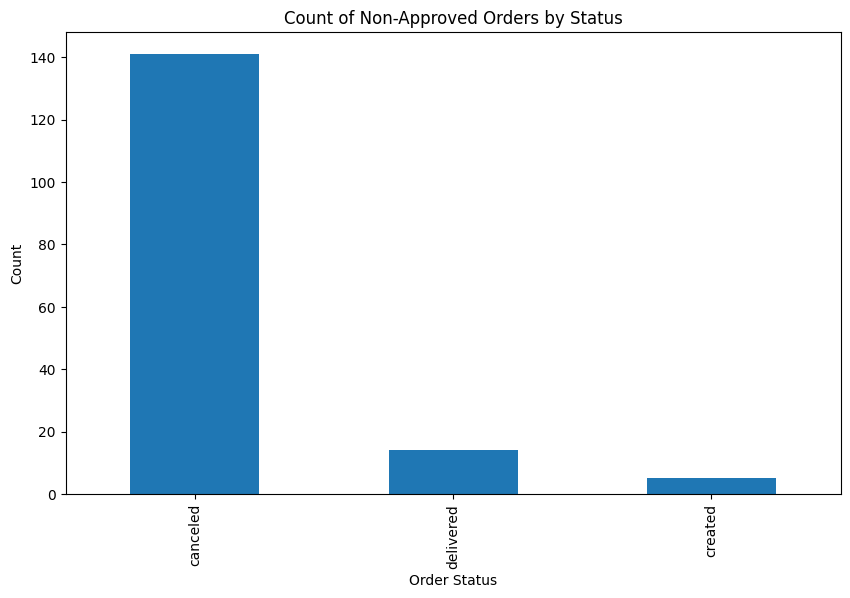

In [12]:
# Creating a simple plot with matplotlib: count of non-approved orders by status

plt.figure(figsize=(10, 6))
null_orders_valuecounts.plot(kind='bar')
plt.title('Count of Non-Approved Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


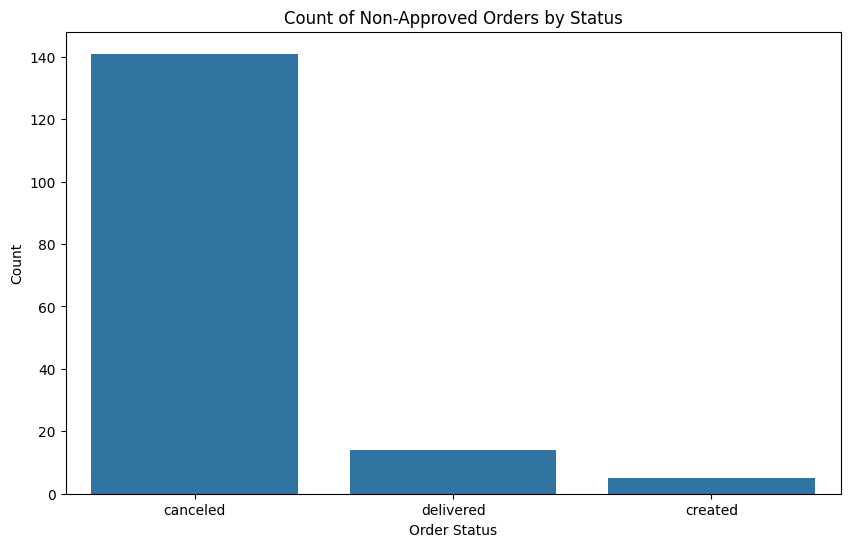

In [13]:
# Creating a simple plot with seaborn: count of non-approved orders by status

plt.figure(figsize=(10, 6))
sns.barplot(x=null_orders_valuecounts.index, 
            y=null_orders_valuecounts.values)
plt.title('Count of Non-Approved Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


## D - Exploring all dataframes at once

In [14]:
# an interesting way to look at all dataframes at once, to quickly get what are the null columns

# Collections for each dataset
datasets = [df_customer, df_geolocation, df_orders, df_order_items, df_order_payments,
            df_order_reviews, df_products, df_sellers]
names = ['df_customer', 'df_geolocation', 'df_orders', 'df_order_items', 'df_order_payments',
         'df_order_reviews', 'df_products', 'df_sellers']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()


,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,df_customer,99441,5,0,0,
1,df_geolocation,1000163,5,0,0,
2,df_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,df_order_items,112650,7,0,0,
4,df_order_payments,103886,5,0,0,
5,df_order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,df_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,df_sellers,3095,4,0,0,


**What are the dataframes with the most null columns? What's your explanation?**

*->answer:* The df with the most null columns are first df_products then df_orders then df_order_reviews

## E - Joining 2 dataframes - how many orders were created in SP state?

In [15]:
for i, dataset in enumerate(datasets):
    if "seller_id" in dataset.columns:
        print(f"Found seller_id in dataset: {names[i]}")
        print("-"*100)



Found seller_id in dataset: df_order_items
----------------------------------------------------------------------------------------------------
Found seller_id in dataset: df_sellers
----------------------------------------------------------------------------------------------------


In [16]:
# Merge the 2 datasets in a new df_merged dataset, and print the first 5 rows
df_merged = pd.merge(df_order_items, df_sellers, on='seller_id')
df_merged.head(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [17]:
# filter the dataframe to have only rows with state = SP, and print the first 5 lines

df_merged_sp = df_merged[df_merged['seller_state'] == 'SP']
df_merged_sp.head(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,14091,ribeirao preto,SP
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,1026,sao paulo,SP


In [18]:
# count the number of orders by state, using both groupby and value_counts

# with groupby method
df_merged.groupby('seller_state')['order_id'].count().sort_values(ascending=False)

# with value_counts method
df_merged['seller_state'].value_counts()


seller_state
SP    80342
MG     8827
PR     8671
RJ     4818
SC     4075
RS     2199
DF      899
BA      643
GO      520
PE      448
MA      405
ES      372
MT      145
CE       94
RN       56
MS       50
PB       38
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: count, dtype: int64

# II - Exploratory analysis 

our objective is to a) give an overview of the business, b) understand what's driving the bad reviews

## A - Creating a uniform dataframe for our analysis

**Creating an ERD of the database**

- in an ERD diagram tool 
- create one item per table
- list all columns
- list their type
- find the primary and foreign keys
- link the tables together

--> upload directly the ERD in the notebook 

In [19]:
# Displaying the image with Ipython Image module

## the image is in the data/ERD folder
# filename = '../data/ERD/olist_erd.png'

# Image(filename=filename)


In [20]:
# Merging the dataframes using the ERD above
df = pd.merge(df_orders, df_order_items, on='order_id')
df = pd.merge(df, df_order_payments, on='order_id')
df = pd.merge(df, df_order_reviews, on='order_id')
df = pd.merge(df, df_products, on='product_id')
df = pd.merge(df, df_sellers, on='seller_id')
df = pd.merge(df, df_customer, on='customer_id')


In [21]:
# Cleaning the dataframe and creating additional columns that will be useful for further analysis

# Ensure timestamps are in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

# Create useful features from order_purchase_timestamp
df['year'] = df['order_purchase_timestamp'].dt.year                   # year as integer
df['month'] = df['order_purchase_timestamp'].dt.month_name()                  # month as integer
df['week'] = df['order_purchase_timestamp'].dt.weekday                   # week in iso format (1, 2, 3 etc.)
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.dayofweek        # day of week as integer (1 = Monday, etc.)
df['hour'] = df['order_purchase_timestamp'].dt.hour                   # hour of day
df['year_month'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')             # year and month, just like 2017-10

df.dtypes


order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                         object
order_delivered_carrier_date              object
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date             object
order_item_id                              int64
product_id                                object
seller_id                                 object
shipping_limit_date                       object
price                                    float64
freight_value                            float64
payment_sequential                         int64
payment_type                              object
payment_installments                       int64
payment_value                            float64
review_id                                 object
review_score                               int64
review_comment_title

## B - Looking at Reviews

### 1 - Let's look at the distribution of the review score

<Figure size 1000x600 with 0 Axes>

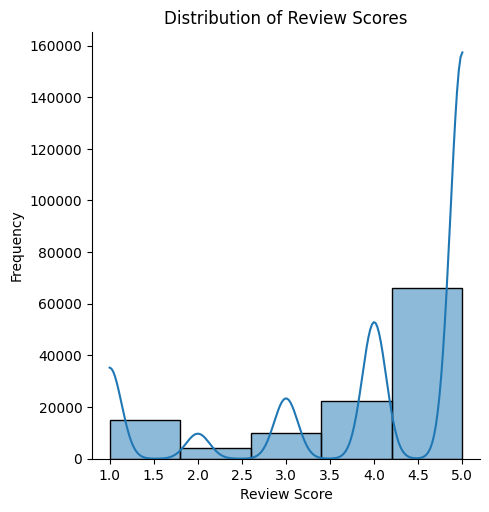

In [22]:
# Create a distribution plot (dist plot) with seaborn on the review score
plt.figure(figsize=(10, 6))
sns.displot(df['review_score'], kde=True, bins=5)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

**What do you make of those results?**

*->answer:* That most orders have a great review score > 4.25 because frequency is the highest

### 2 - Let's look at the customer verbatims

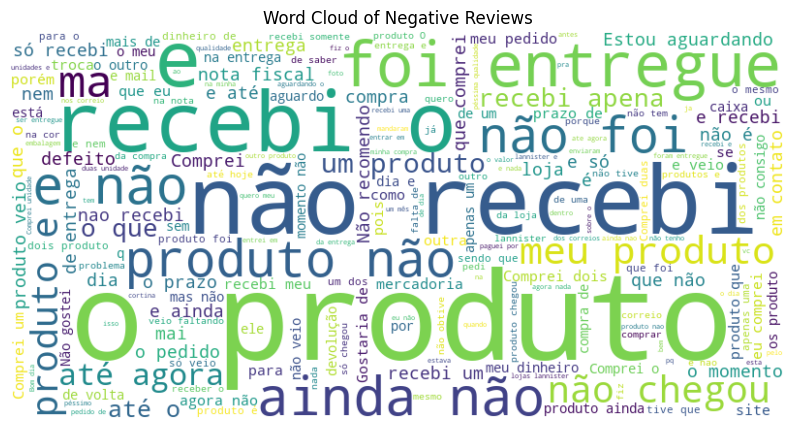

In [23]:
# Create a wordcloud on orders with negative reviews only

# I assumed that negative reviews are those with a score <= 2
negative_reviews = df[df['review_score'] <= 2]
negative_text = ' '.join(negative_reviews['review_comment_message'].dropna())

# Create and display the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

**What are the first reasons you see behind a bad review? What could we do to improve this wordcloud?**

*-> answer:* That there are many words related to the products but also negative works like "nao" which means that the consumers were not happy with the product

### 3 - Let's create a correlation matrix and identify other reasons behind bad reviews

In [24]:
# let's isolate the columns we'll use for our correlation matrix

# print all the columns and their types using the method of your choice
print(df.columns)
print("-"*100)
print(df.dtypes)



Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'delivery_time', 'year', 'month', 'week',
       'day_of_week_int', 'hour', 'year_mont

In [25]:
# bonus: can we create additional features?
# example: create a is_delivered column?

df['is_delivered'] = df['order_delivered_customer_date'].notna().astype(int)
print(df['is_delivered'].value_counts())


is_delivered
1    114858
0      2471
Name: count, dtype: int64


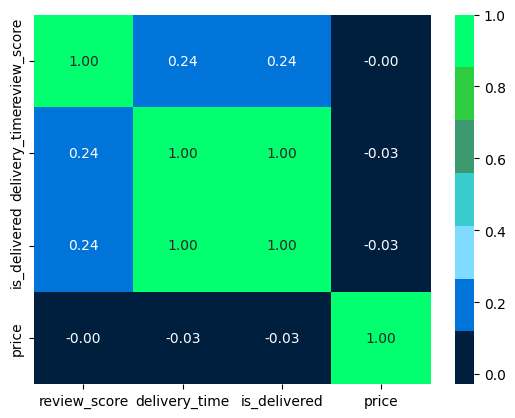

In [26]:
# Create the correlation matrix based on the columns you want

# Select relevant features for correlation analysis

colors = ['#001F3F', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70']

correlation_features = df[['review_score','delivery_time','is_delivered','price']]

# Calculate the correlation matrix
correlation = correlation_features.corr()

# use seaborn to print the correlation matrix
sns.heatmap(correlation, cmap=colors, annot=True, fmt='.2f')
plt.show()


**What are the correlations you see?**

*-> answer:* That the review score is low if the order is not delivered, which makes sense

## C - Looking at orders

### 1 - Orders by statuses

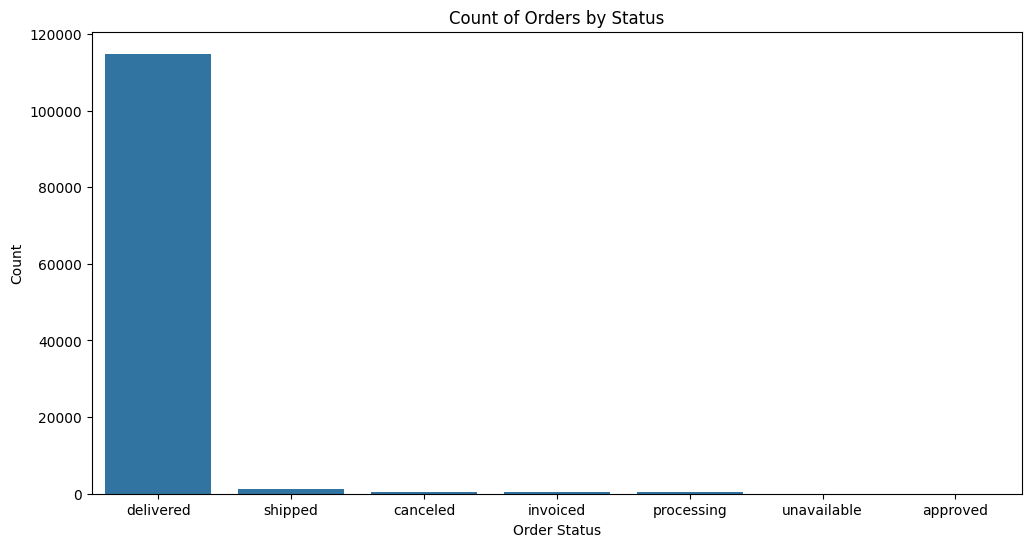

In [27]:
# Create a visualization to count the orders by statuses

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='order_status', order=df['order_status'].value_counts().index)
plt.title('Count of Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


### 2 - Evolution of total orders over time

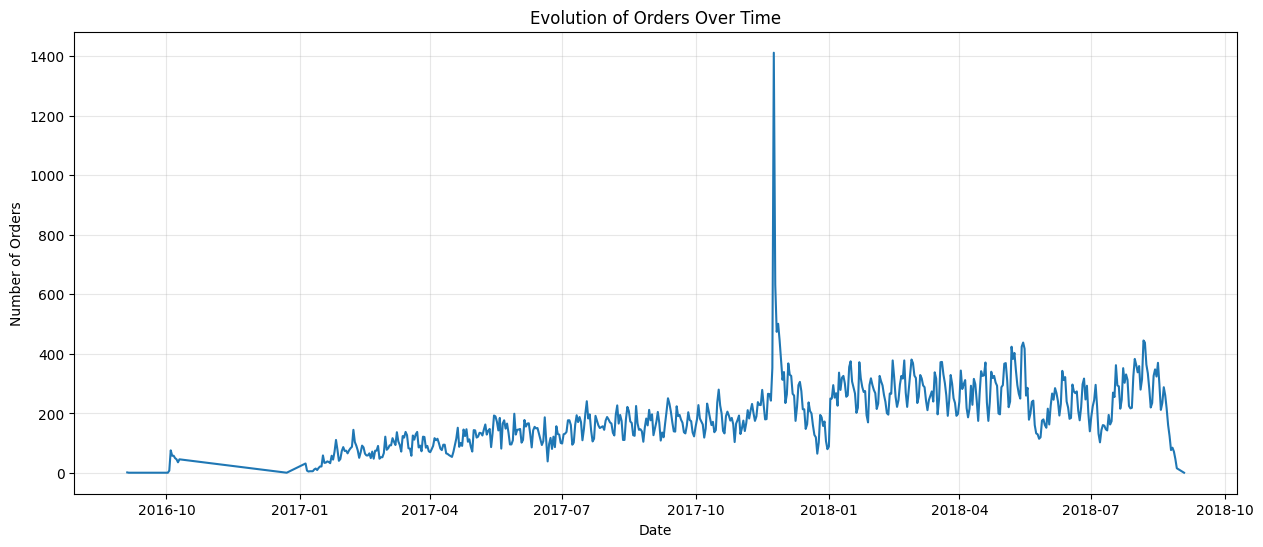

In [28]:
# Create a visualization to see the evolution of orders over time
orders_by_date = df.groupby(df['order_purchase_timestamp'].dt.date).size().reset_index()
orders_by_date.columns = ['date', 'count']

# Visualization 2: Orders over time
plt.figure(figsize=(15, 6))
plt.plot(orders_by_date['date'], orders_by_date['count'])
plt.title('Evolution of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.show()


### 3 - Comparing 2017 and 2018 (bonus)

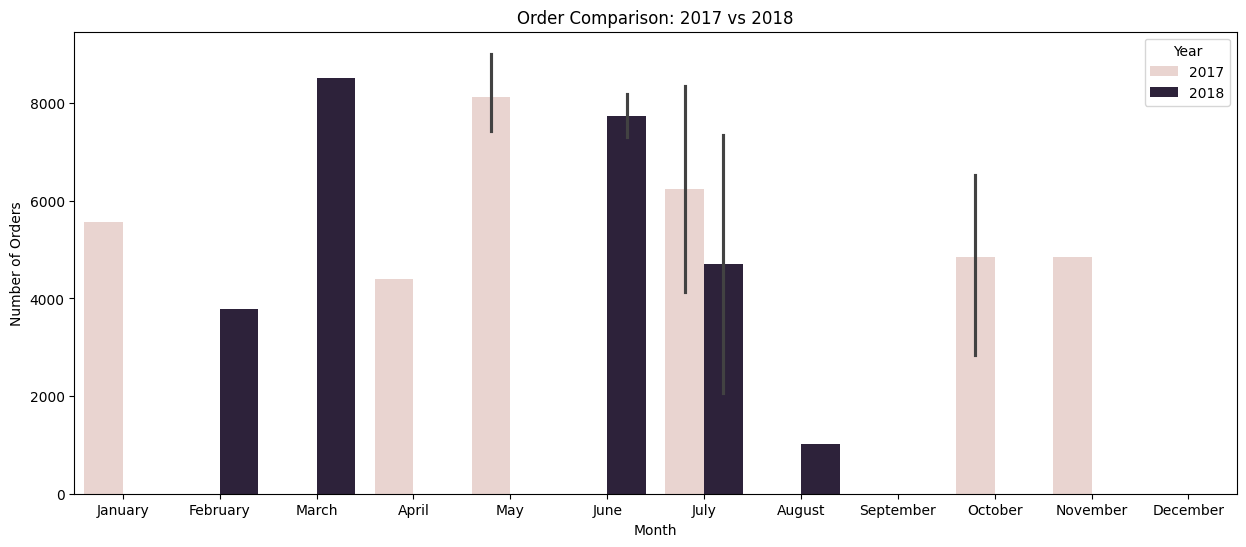

In [29]:
# Create a visualization to compare 2017 and 2018 on the same graph (bar charts with a "hue" = 'year'

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

yearly_comparison = df[df['year'].isin([2017, 2018])]

plt.figure(figsize=(15, 6))
sns.barplot(data=yearly_comparison, 
            x='month', 
            y=yearly_comparison.groupby(['year', 'month']).size().reset_index(name='count')['count'],
            hue='year',
            order=month_order)
plt.title('Order Comparison: 2017 vs 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Year')
plt.show()


## D - Delivery times

### 1 - Delivery time by product category

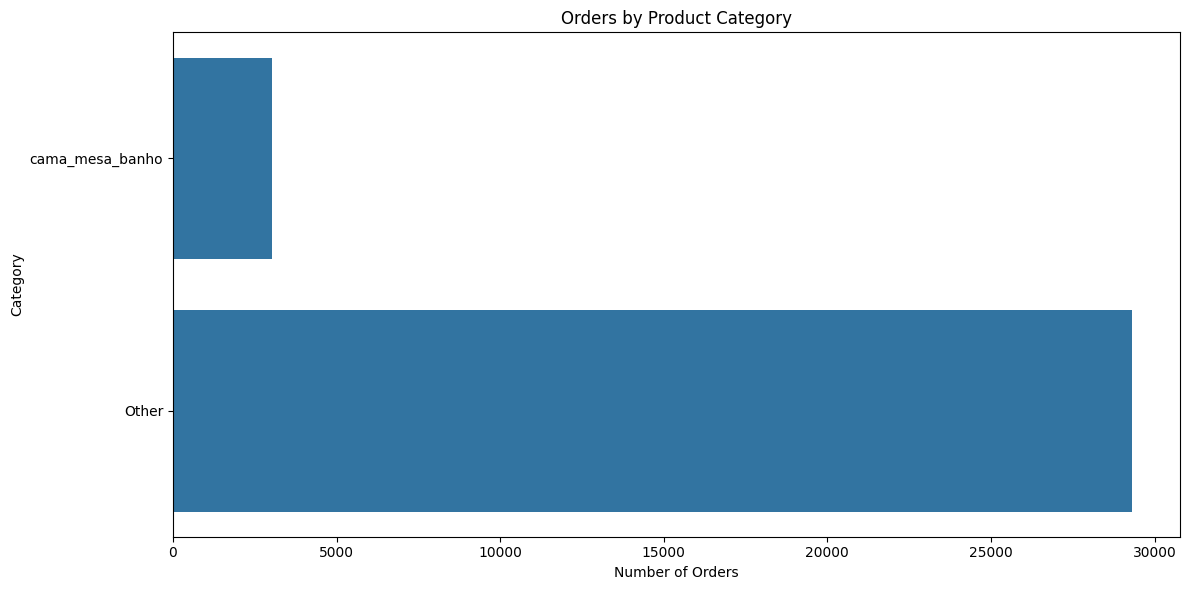

In [30]:
# Start by counting the orders by product category, and create an 'Other section' for product categories that have the lowest amount of orders

# Count the occurrences of each product category
category_counts = df_products['product_category_name'].value_counts()


# Only keep the product category that are above a certain threshold, put the others in a "Other' category
threshold = 3000
major_categories = category_counts[category_counts >= threshold]
other_count = category_counts[category_counts < threshold].sum()

final_counts = pd.concat([major_categories, pd.Series({'Other': other_count})])

plt.figure(figsize=(12, 6))
sns.barplot(x=final_counts.values, y=final_counts.index)
plt.title('Orders by Product Category')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


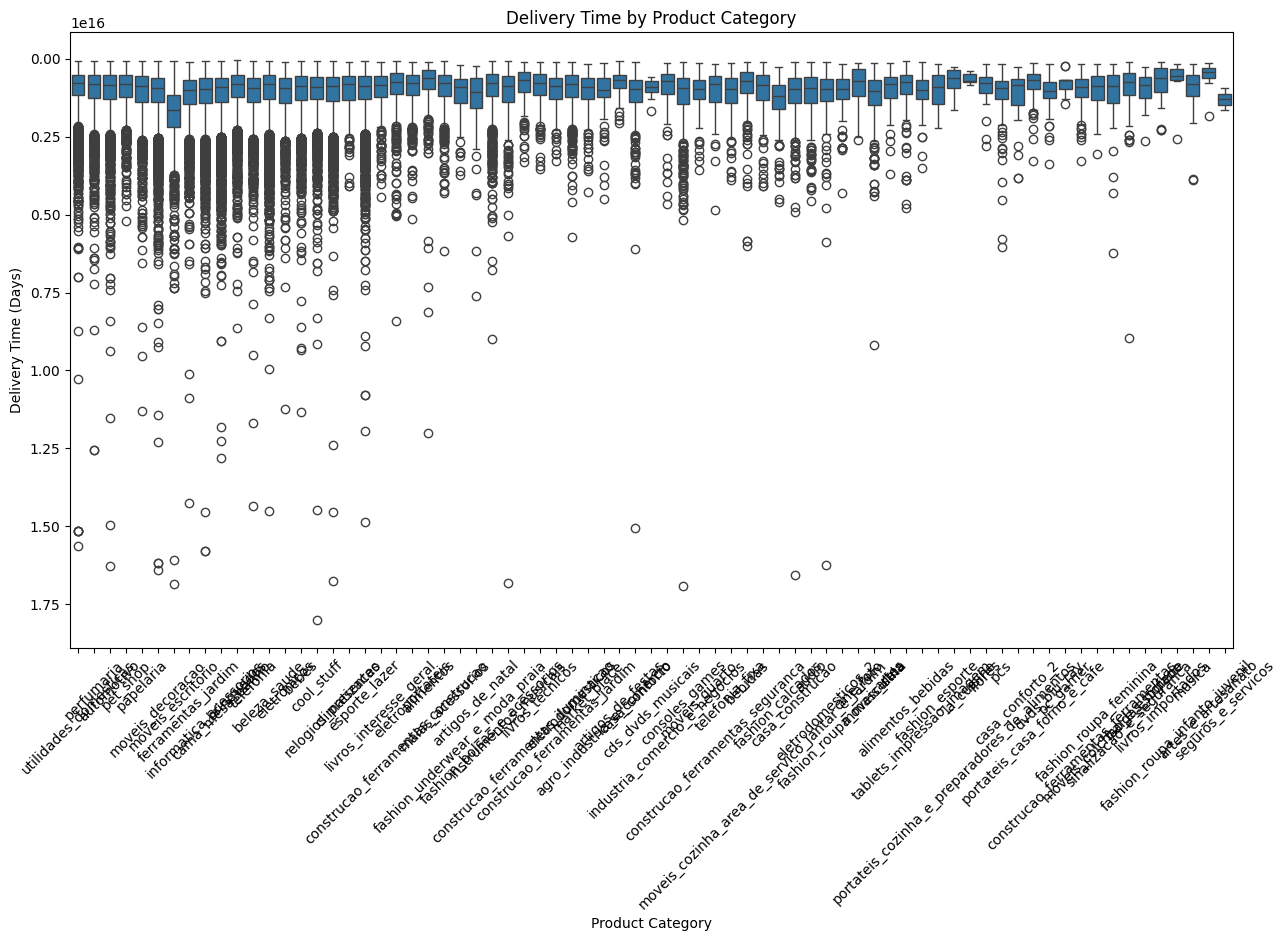

In [31]:
# Create a boxplot visualization that shows the delivery time by product category

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='product_category_name', y='delivery_time')
plt.title('Delivery Time by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Delivery Time (Days)')
plt.show()


### 2 - Delivery time by day of the week

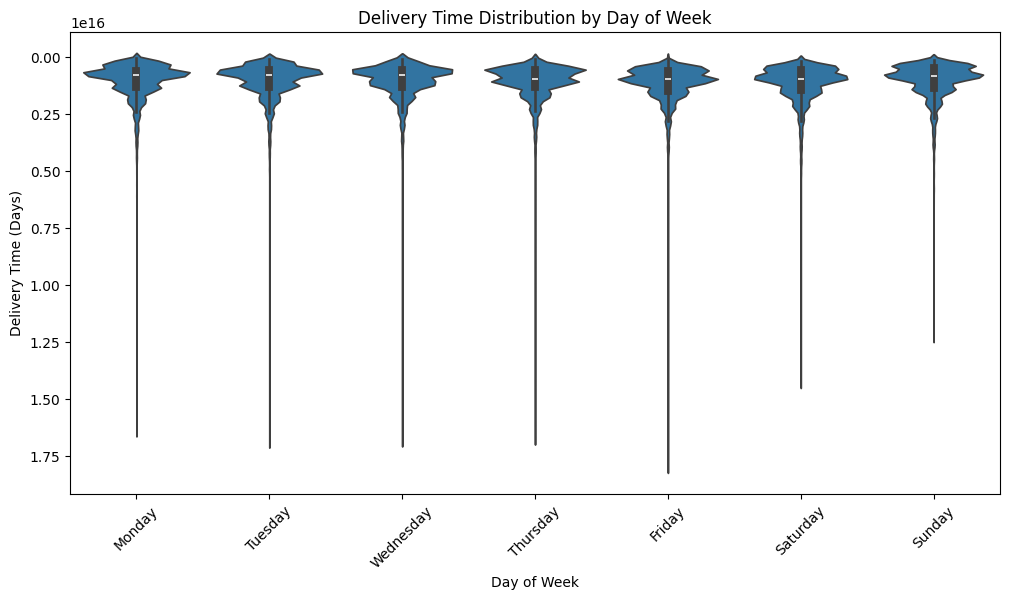

In [32]:
# Create a violin box plot visualization to see the delivery time by day of the week

df['day_of_week'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day_name()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='day_of_week', y='delivery_time',
               order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Delivery Time Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Delivery Time (Days)')
plt.xticks(rotation=45)
plt.show()

### 3 - Average delivery time by month  (bonus)

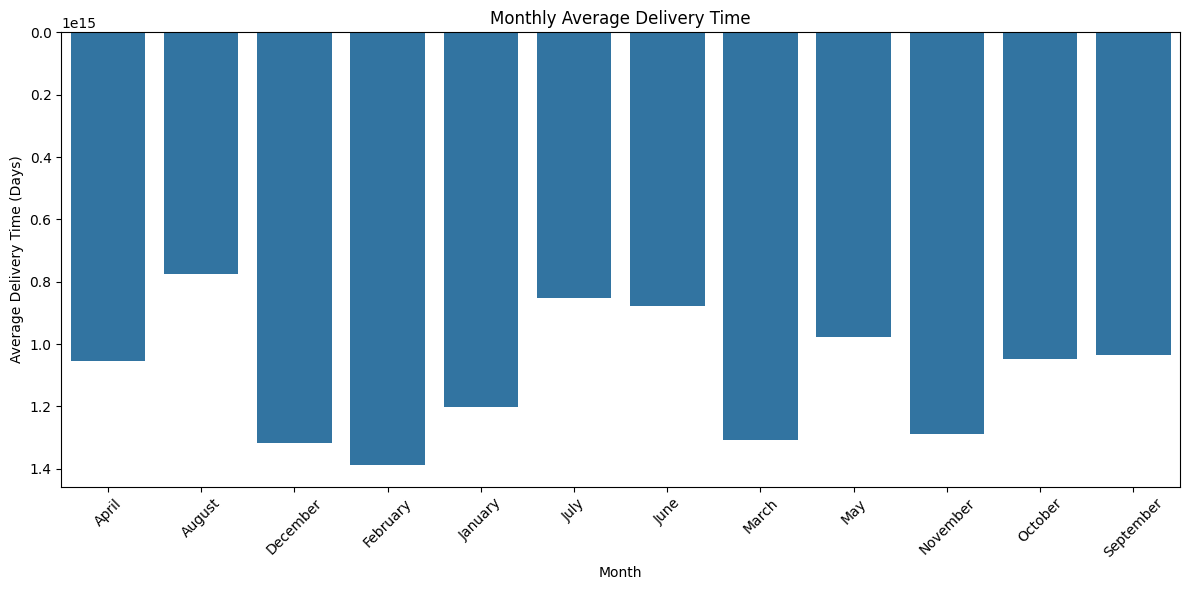

In [33]:
# Create barplot for the monthly average delivery time
monthly_avg_delivery = df.groupby('month')['delivery_time'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_delivery.index.astype(str), y=monthly_avg_delivery.values)
plt.title('Monthly Average Delivery Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## E - Bonus

### 1 - Order distribution by day of week and time of day 

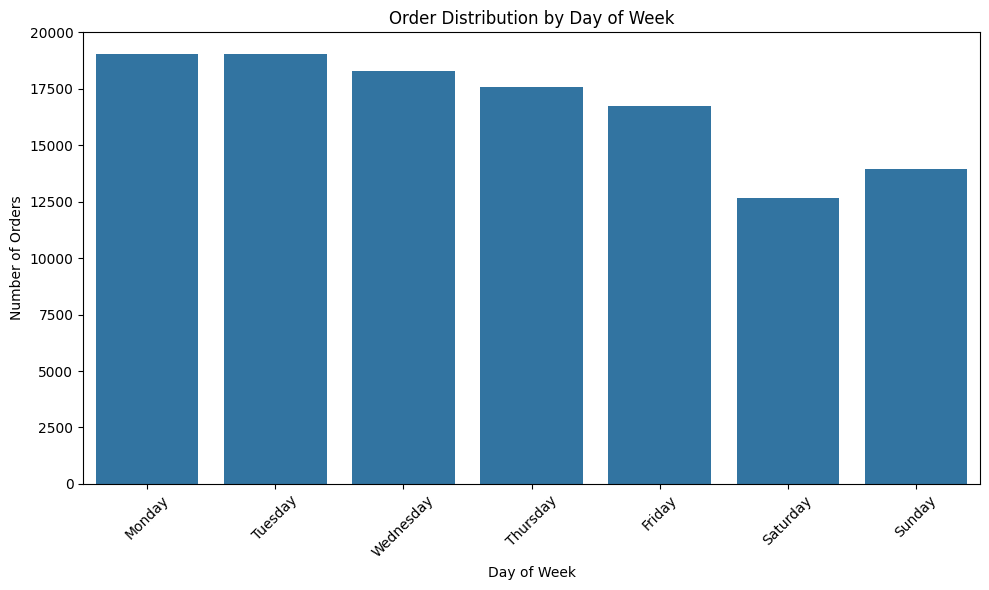

In [34]:
# Count plot showing order distribution by day of week

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Order Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


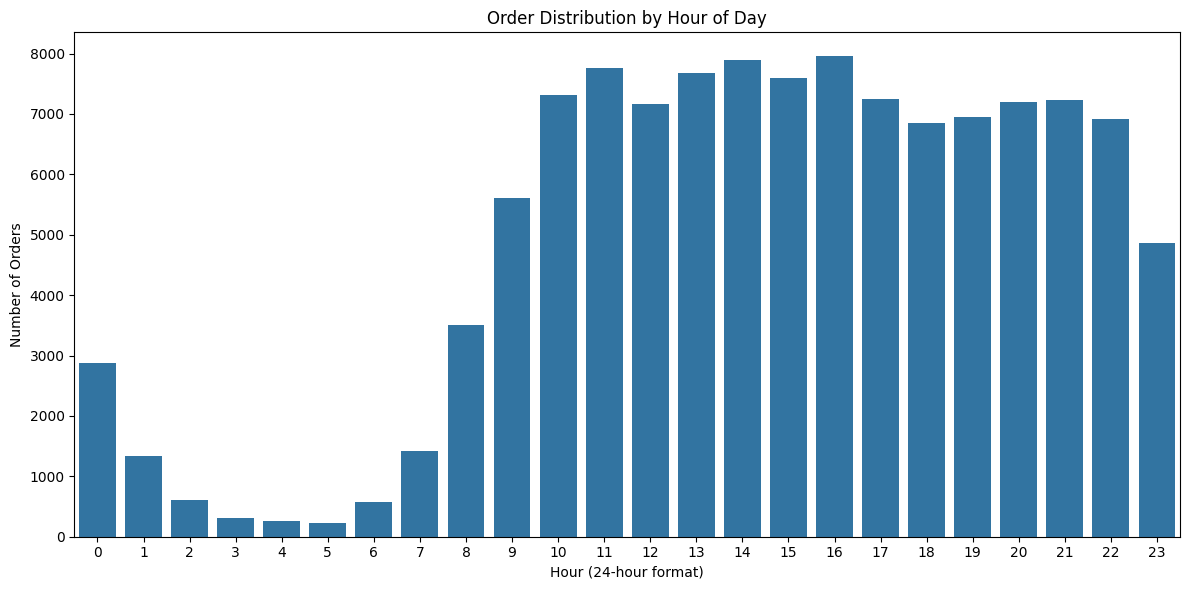

In [35]:
# Count plot showing order distribution by time of day

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour')
plt.title('Order Distribution by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


### 2 - Payments

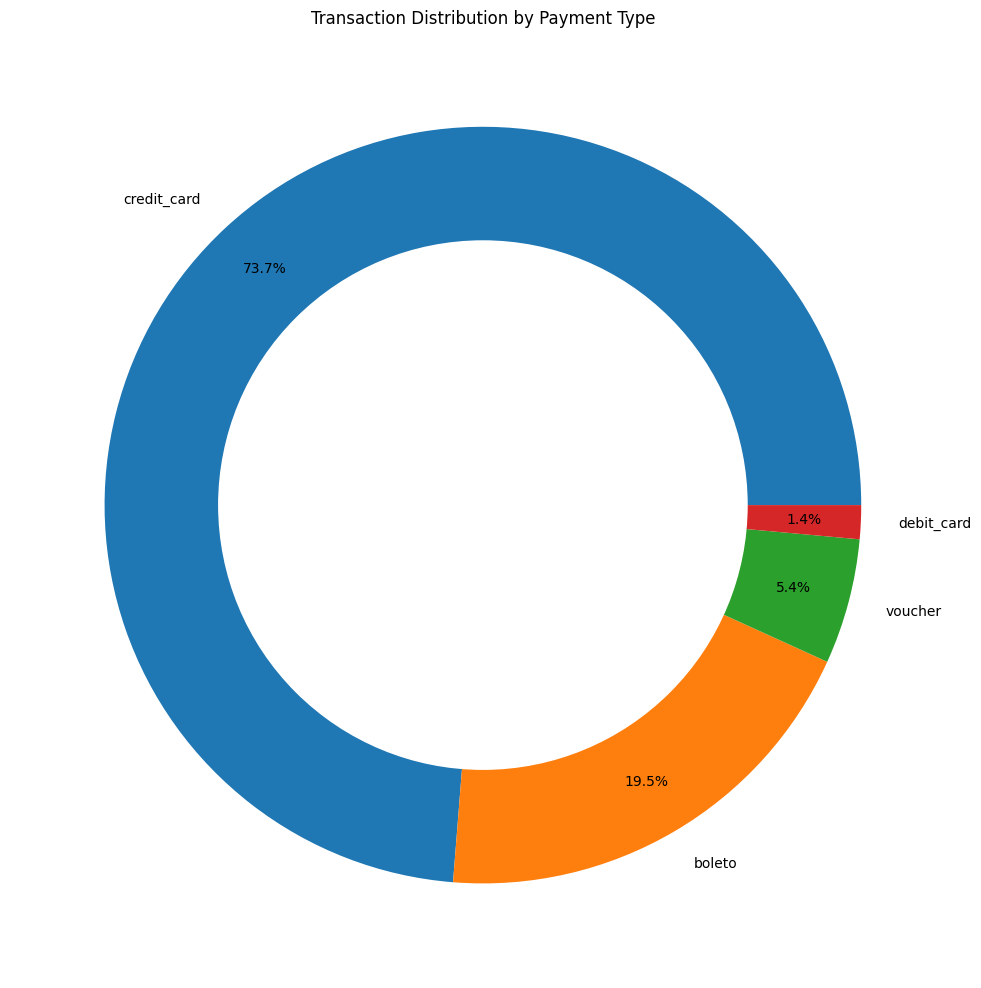

In [36]:
# Create a donut (pie chart) that show transactions by payment types

payment_counts = df['payment_type'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Transaction Distribution by Payment Type')
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.tight_layout()
plt.show()



<Figure size 1500x800 with 0 Axes>

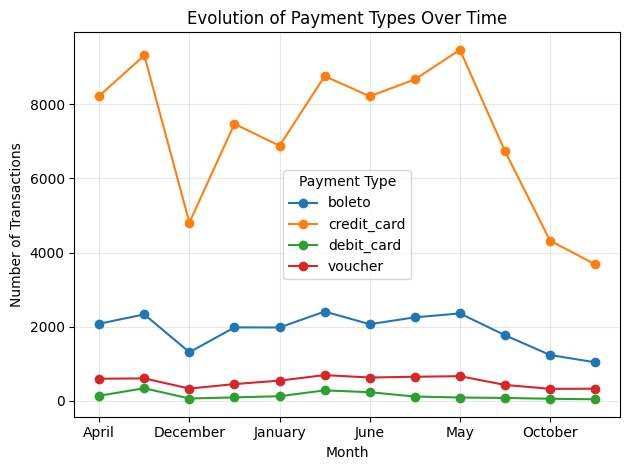

In [37]:
# Show the evolution of payment types over time


payment_evolution = df.groupby(['month', 'payment_type']).size().unstack()

plt.figure(figsize=(15, 8))
payment_evolution.plot(kind='line', marker='o')
plt.title('Evolution of Payment Types Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 3 - Geolocation

In [38]:
! pip install folium
! pip install geopy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# # Create a heatmap of all orders by location using an API to retrieve the latitude and longitude of every location, and display them on a map
# import folium
# from folium.plugins import HeatMap
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # First, let's get unique city-state combinations and create location strings
# locations_df = df[['customer_city', 'customer_state']].drop_duplicates()
# locations_df['location'] = locations_df['customer_city'] + ', ' + locations_df['customer_state'] + ', Brazil'

# # Initialize the geocoder
# geolocator = Nominatim(user_agent="my_olist_app")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# # Create function to safely get coordinates
# def get_coordinates(location):
#     try:
#         location_data = geocode(location)
#         if location_data:
#             return pd.Series([location_data.latitude, location_data.longitude])
#         return pd.Series([None, None])
#     except:
#         return pd.Series([None, None])

# # Get coordinates for each unique location
# print("Getting coordinates for each location (this may take a few minutes)...")
# locations_df[['latitude', 'longitude']] = locations_df['location'].apply(get_coordinates)

# # Remove any rows where geocoding failed
# locations_df = locations_df.dropna(subset=['latitude', 'longitude'])

# # Merge coordinates back to original dataframe
# df_with_coords = df.merge(
#     locations_df[['customer_city', 'customer_state', 'latitude', 'longitude']], 
#     on=['customer_city', 'customer_state']
# )

# # Create the heatmap
# print("Creating heatmap...")
# brazil_map = folium.Map(location=[-14.235, -51.925], zoom_start=4)

# # Get coordinates list with weights (count of orders per location)
# heat_data = df_with_coords.groupby(['latitude', 'longitude']).size().reset_index()
# heat_data.columns = ['latitude', 'longitude', 'count']
# locations_list = heat_data[['latitude', 'longitude', 'count']].values.tolist()

# # Add heatmap layer
# HeatMap(locations_list).add_to(brazil_map)

# # Save the map
# brazil_map.save('brazil_orders_heatmap.html')
# print("Heatmap has been saved as 'brazil_orders_heatmap.html'")

# # Print some statistics
# print("\nGeocoding Statistics:")
# print(f"Total unique locations: {len(locations_df)}")
# print(f"Successfully geocoded locations: {len(locations_df.dropna(subset=['latitude', 'longitude']))}")

### 4 - Profit computation

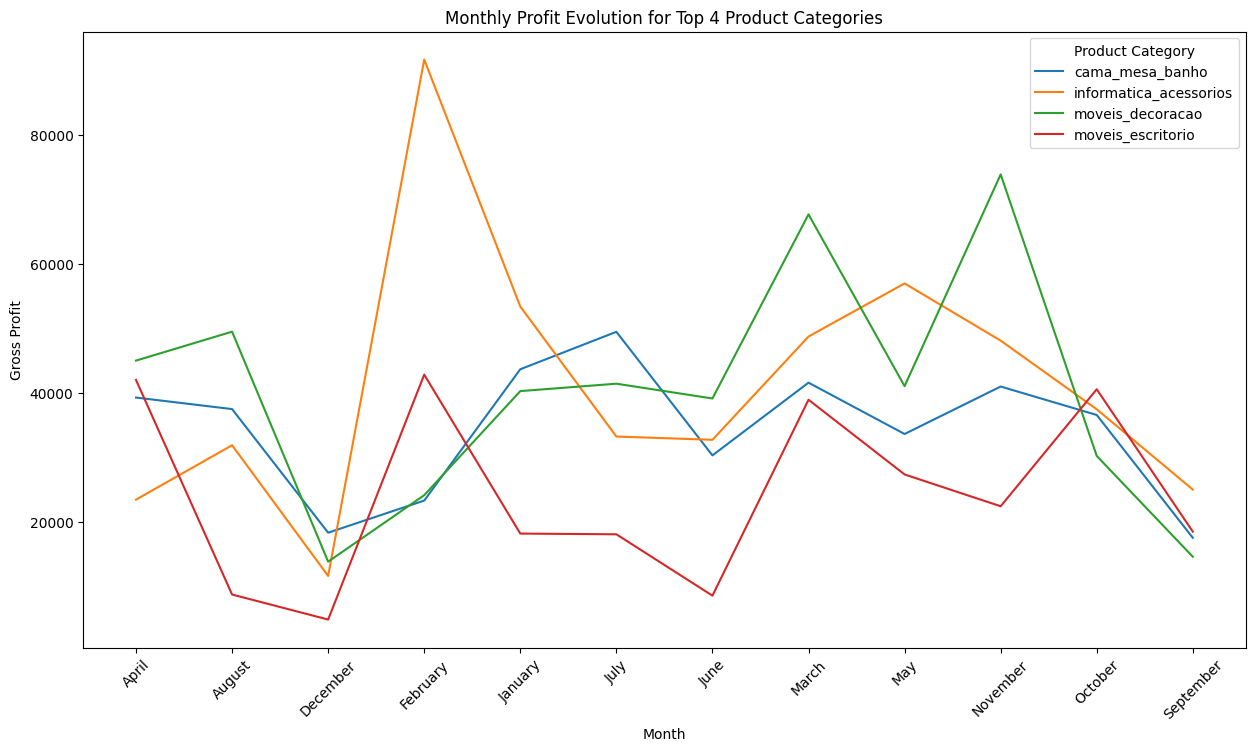

In [45]:
# Show the monthly profit evolution for the best 4 product categories
# x axis: months
# y axis: gross profit (payment value - total order value)
# hue : top product categories

df['total_order_value'] = df['price'] + df['freight_value']

# Calculate gross profit (payment_value - total_order_value)
df['gross_profit'] = df['payment_value'] - df['total_order_value']

top_categories = df.groupby('product_category_name')['gross_profit'].sum().nlargest(4).index

top_cat_profits = df[df['product_category_name'].isin(top_categories)].copy()

monthly_cat_profits = top_cat_profits.groupby(['month', 'product_category_name'])['gross_profit'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_cat_profits, 
             x='month', 
             y='gross_profit',
             hue='product_category_name')
plt.title('Monthly Profit Evolution for Top 4 Product Categories')
plt.xlabel('Month')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()